In [1]:
import seaborn as sn 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('C:\email classifier\sms_spam.csv')

In [4]:
df.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
le=LabelEncoder()
df['label']=le.fit_transform(df['label'])

data cleaning

In [6]:
df=df.drop_duplicates(keep='first')

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.shape

(5169, 2)

eda



<Axes: ylabel='count'>

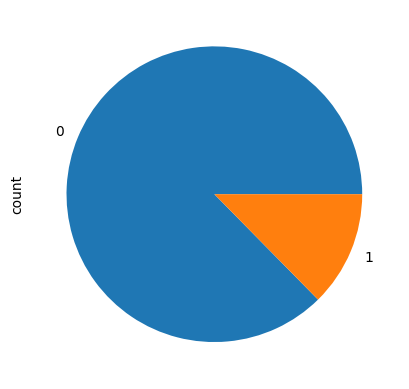

In [9]:
df['label'].value_counts().plot(kind='pie')

In [ ]:
#data is imbalance

In [10]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\Alee
[nltk_data]    |     Bushu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to C:\Users\Alee
[nltk_data]    |     Bushu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Alee Bushu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Alee Bushu\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Alee Bushu\AppDa

True

In [11]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\Alee
[nltk_data]     Bushu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
df['num_char']=df['text'].apply(len)

In [13]:
df.head()

,label,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to C:\Users\Alee
[nltk_data]     Bushu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
df['nums_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [16]:
df.head()

,label,text,num_char,nums_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [17]:
df['nums_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [18]:
df[['label','num_char','nums_words', 'nums_sentences']].corr()

,label,num_char,nums_words,nums_sentences
label,1.000000,0.379791,0.260168,0.263826
num_char,0.379791,1.000000,0.966003,0.622580
nums_words,0.260168,0.966003,1.000000,0.679142
nums_sentences,0.263826,0.622580,0.679142,1.000000


In [19]:
df[df['label']==1][['label','num_char','nums_words', 'nums_sentences']].describe()

,label,num_char,nums_words,nums_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.704441,27.762634,2.986217
std,0.0,29.821348,6.993008,1.494815
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,148.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,223.000000,46.000000,9.000000


In [20]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

<Axes: xlabel='num_char', ylabel='Count'>

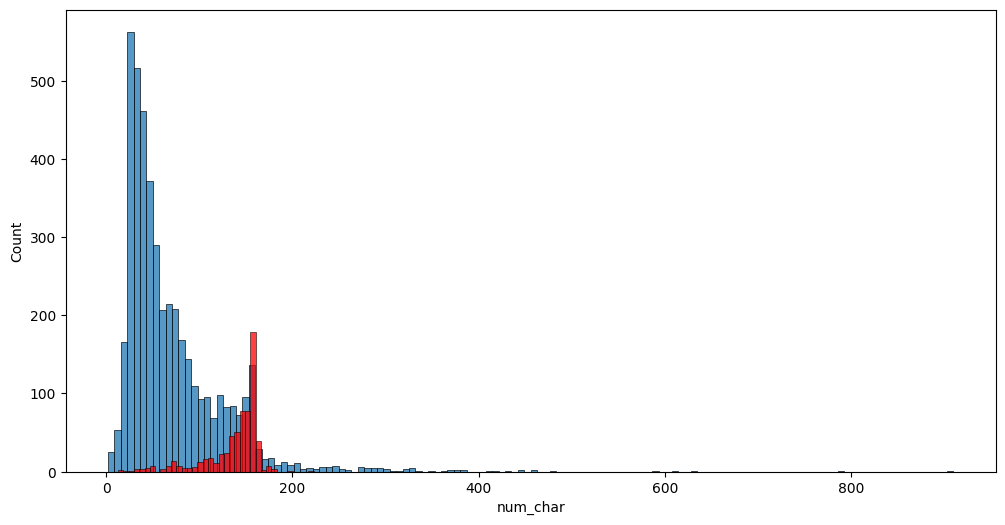

In [23]:
plt.figure(figsize=(12,6))
sn.histplot(df[df['label'] == 0]['num_char'])
sn.histplot(df[df['label'] == 1]['num_char'],color='red')

<Axes: xlabel='nums_words', ylabel='Count'>

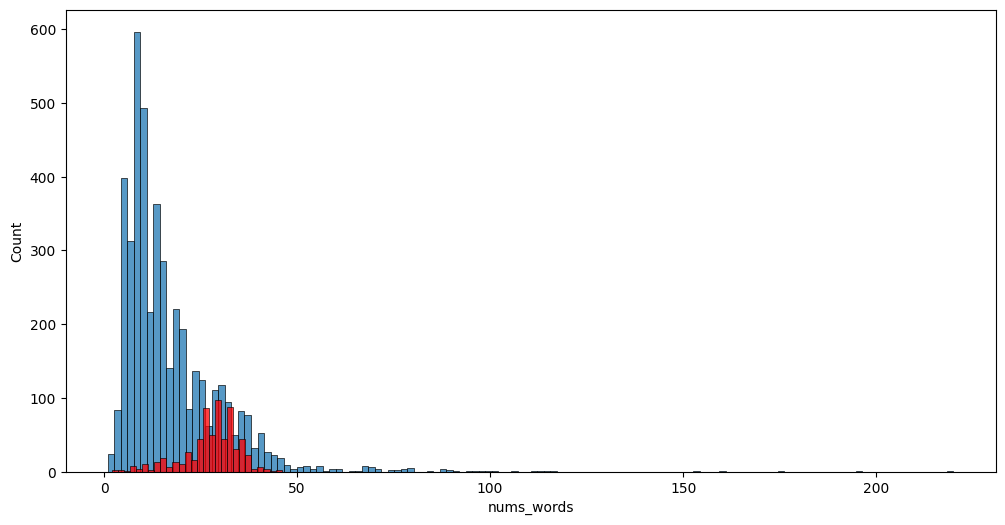

In [24]:
plt.figure(figsize=(12,6))
sn.histplot(df[df['label'] == 0]['nums_words'])
sn.histplot(df[df['label'] == 1]['nums_words'],color='red')

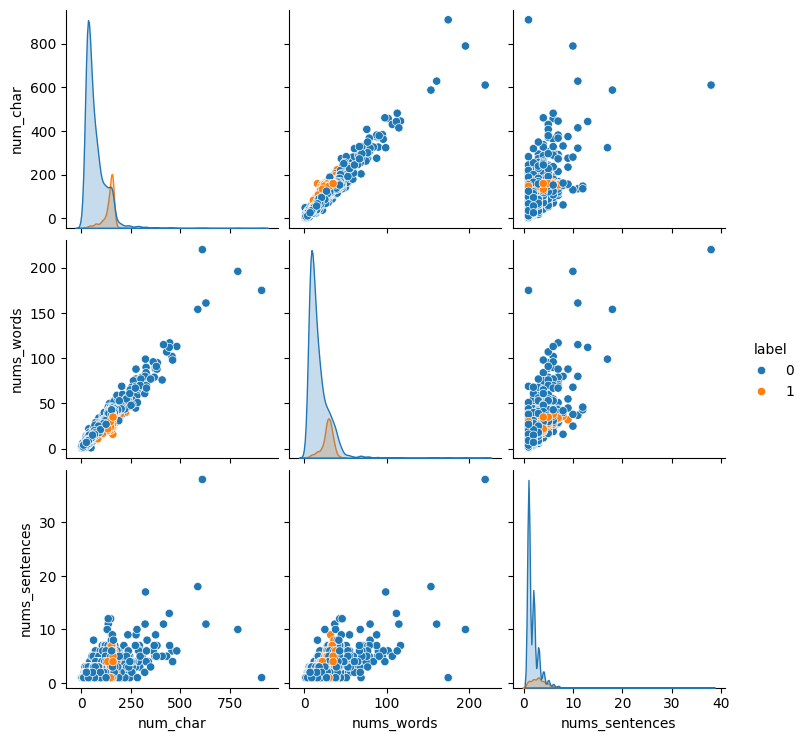

In [26]:
sn.pairplot(df,hue='label')


<Axes: >

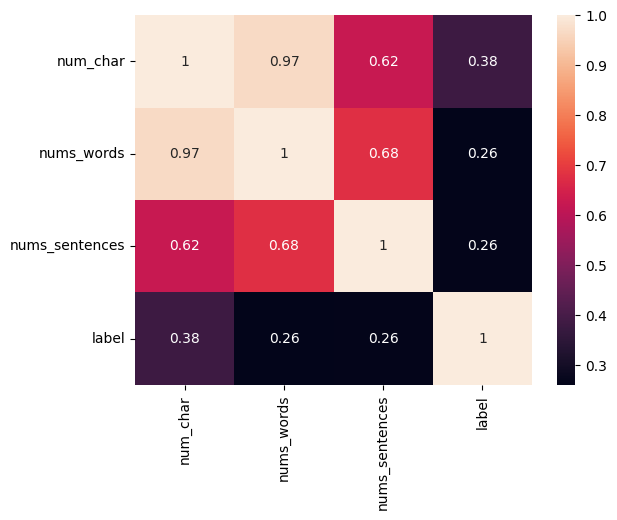

In [29]:
sn.heatmap(df[['num_char', 'nums_words','nums_sentences','label']].corr(),annot=True)


In [35]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
ps = PorterStemmer()


In [36]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [37]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [38]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()


,label,text,num_char,nums_words,nums_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [40]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [41]:
len(spam_corpus)

9982

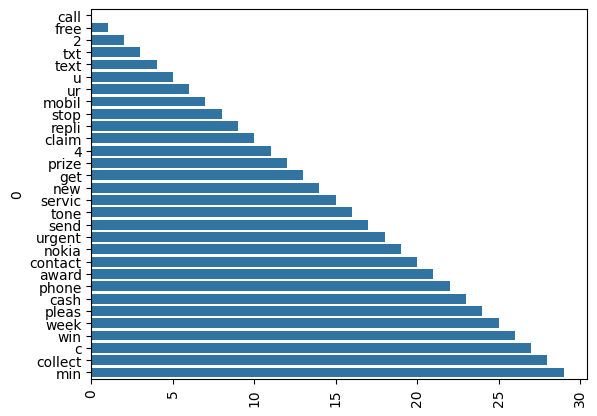

In [45]:
from collections import Counter
sn.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

MODEL BULDING


In [47]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)



In [48]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['label'].values

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [50]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [51]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [52]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8636363636363636
[[790 118]
 [ 23 103]]
0.4660633484162896


In [53]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9671179883945842
[[908   0]
 [ 34  92]]
1.0


In [54]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9738878143133463
[[906   2]
 [ 25 101]]
0.9805825242718447


# tfidf --> MNB


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [56]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [57]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [58]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [59]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9729206963249516, 0.9803921568627451)

In [60]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9803921568627451
For  KN
Accuracy -  0.9187620889748549
Precision -  1.0
For  NB
Accuracy -  0.9671179883945842
Precision -  1.0
For  DT
Accuracy -  0.9400386847195358
Precision -  0.8404255319148937
For  LR
Accuracy -  0.9487427466150871
Precision -  0.9195402298850575
For  RF
Accuracy -  0.9680851063829787
Precision -  0.979381443298969
For  AdaBoost
Accuracy -  0.9226305609284333
Precision -  0.7948717948717948
For  BgC
Accuracy -  0.9632495164410058
Precision -  0.8793103448275862
For  ETC
Accuracy -  0.9777562862669246
Precision -  0.9724770642201835
For  GBDT
Accuracy -  0.9448742746615088
Precision -  0.9259259259259259
For  xgb
Accuracy -  0.9661508704061895
Precision -  0.9595959595959596


In [61]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.918762,1.000000
2,NB,0.967118,1.000000
0,SVC,0.972921,0.980392
5,RF,0.968085,0.979381
8,ETC,0.977756,0.972477
10,xgb,0.966151,0.959596
9,GBDT,0.944874,0.925926
4,LR,0.948743,0.919540
7,BgC,0.963250,0.879310
3,DT,0.940039,0.840426


In [62]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [63]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')
voting.fit(X_train,y_train)


AttributeError: 'bool' object has no attribute 'all'

AttributeError: 'bool' object has no attribute 'all'

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [64]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.97678916827853
Precision 0.9903846153846154
